In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
import pandas as pd
from src.agent.train import save_dir
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

/home/osmany/anaconda3/envs/deep-rl-ca/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/osmany/anaconda3/envs/deep-rl-ca/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/osmany/anaconda3/envs/deep-rl-ca/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/osmany/anaconda3/envs/deep-r

In [4]:
int_behavior_dirs = {
    'None': 'int_behaviorno_act_encounter_s0',
    'Random': 'int_behaviorrandom_act_encounter_s0',
    'Single': 'int_behaviorsingle_act_encounter_s0',
    'Sticky': 'int_behaviorsticky_act_encounter_s0'
}
pnmac_dirs = {
    .05: 'pnmac_exp_0.05_s0',
    .1: 'pnmac_exp_0.1_s0',
    .15: 'pnmac_exp_0.15_s0',
    .25: 'pnmac_exp_0.25_s0',
    .5: 'pnmac_exp_0.5_s0'
}
rw_shape_dirs = {
    1e-2: 'rw_shaping_exp0.01_s0',
    3e-3: 'rw_shaping_exp0.003_s0',
    1e-3: 'rw_shaping_exp0.001_s0',
    3e-4: 'rw_shaping_exp0.0003_s0',
    1e-4: 'rw_shaping_exp0.0001_s0'
}

## Results

We want to compare performance between intruder behaviors, pnmacs, and reward shapings.

Compare by: 
1. NMAC rate
2. Alert rate
3. Reversal rate

In [5]:
base_metrics = pd.read_csv(save_dir / 'metrics_n5000_s44.csv')
base_metrics.head()

,nmac,alert,reversal,segments
0,False,False,False,0
1,True,False,False,0
2,False,False,False,0
3,False,False,False,0
4,True,False,False,0


In [6]:
pd.read_csv(save_dir 
            / pnmac_dirs[.05]
            / 'validation' 
            / 'metrics_n5000_s44.csv')

,nmac,alert,reversal,segments
0,False,0,0,0
1,True,0,0,0
2,False,0,0,0
3,False,0,0,0
4,True,5,2,1
...,...,...,...,...
4995,True,0,0,0
4996,False,0,0,0
4997,True,0,0,0
4998,True,0,0,0


In [7]:
def summarize_results(exp_dirs):
    summary_dict = {}
    control = pd.read_csv(save_dir
                / 'metrics_n5000_s44.csv')
    control = control.sum() / control.count()
    summary_dict['Control'] = control
    
    for name, dirname in exp_dirs.items():
        summ = pd.read_csv(save_dir 
                / dirname
                / 'validation' 
                / 'metrics_n5000_s44.csv')
        summ = summ.sum() / summ.count()
        summary_dict[name] = summ
    
    return summary_dict

In [8]:
res_pnmac = summarize_results(pnmac_dirs)
res_int_beh = summarize_results(int_behavior_dirs)
res_rw_shp = summarize_results(rw_shape_dirs)

### Intruder Behavior Plots

<IPython.core.display.Javascript object>


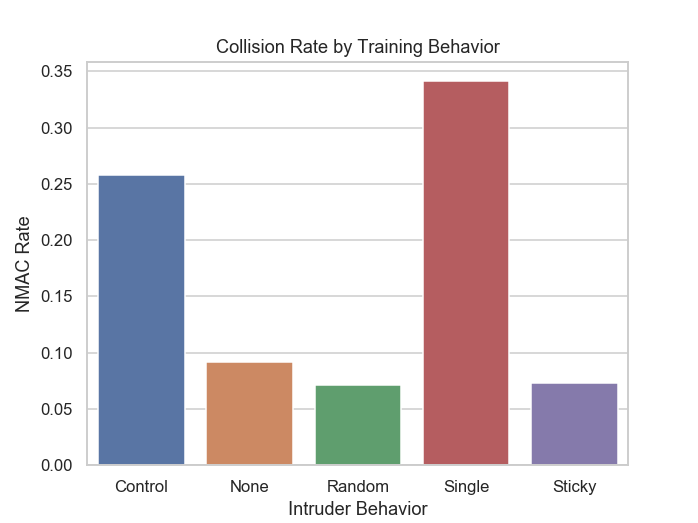

In [9]:
xs = list(res_int_beh.keys())
ys = [res_int_beh[x].nmac for x in xs]

fig, ax = plt.subplots()
sns.barplot(x=xs, y=ys)
plt.xlabel('Intruder Behavior')
plt.ylabel('NMAC Rate')
plt.title('Collision Rate by Training Behavior')
plt.show()

<IPython.core.display.Javascript object>


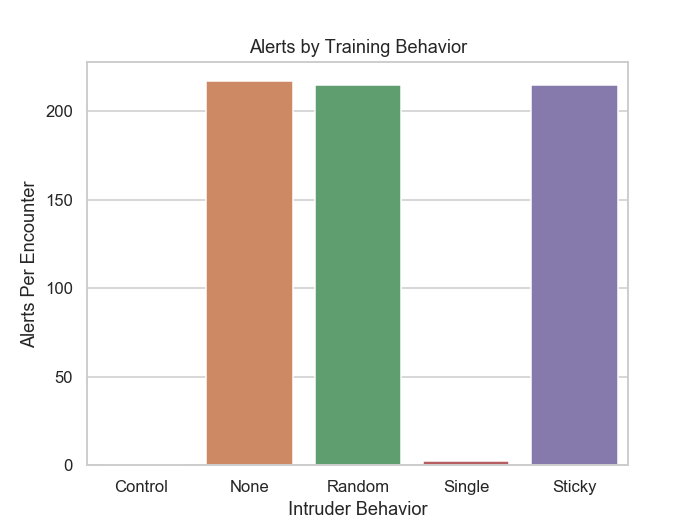

In [11]:
xs = list(res_int_beh.keys())
ys = [res_int_beh[x].alert for x in xs]

fig, ax = plt.subplots()
sns.barplot(x=xs, y=ys)
plt.xlabel('Intruder Behavior')
plt.ylabel('Alerts Per Encounter')
plt.title('Alerts by Training Behavior')
plt.show()

<IPython.core.display.Javascript object>


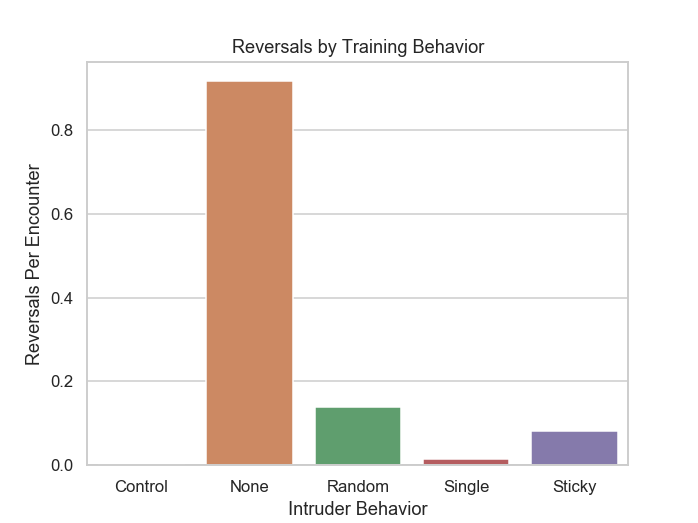

In [10]:
xs = list(res_int_beh.keys())
ys = [res_int_beh[x].reversal for x in xs]

fig, ax = plt.subplots()
sns.barplot(x=xs, y=ys)
plt.xlabel('Intruder Behavior')
plt.ylabel('Reversals Per Encounter')
plt.title('Reversals by Training Behavior')
plt.show()

### PNMAC Plots

<IPython.core.display.Javascript object>


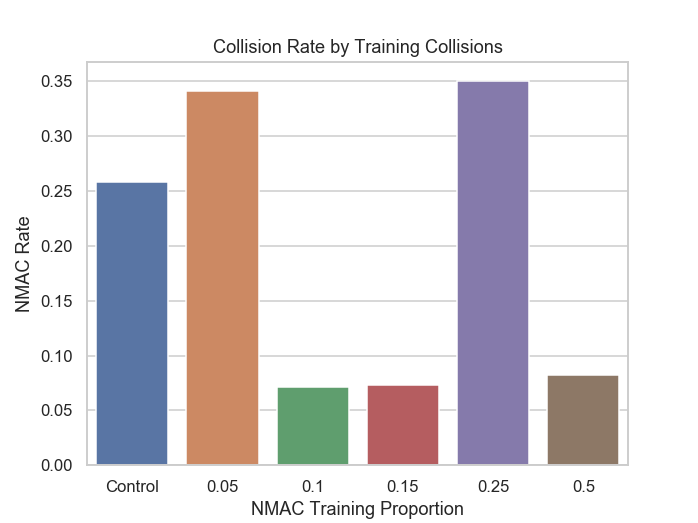

In [12]:
xs = list(res_pnmac.keys())
ys = [res_pnmac[x].nmac for x in xs]

fig, ax = plt.subplots()
sns.barplot(x=xs, y=ys)
plt.xlabel('NMAC Training Proportion')
plt.ylabel('NMAC Rate')
plt.title('Collision Rate by Training Collisions')
plt.show()

<IPython.core.display.Javascript object>


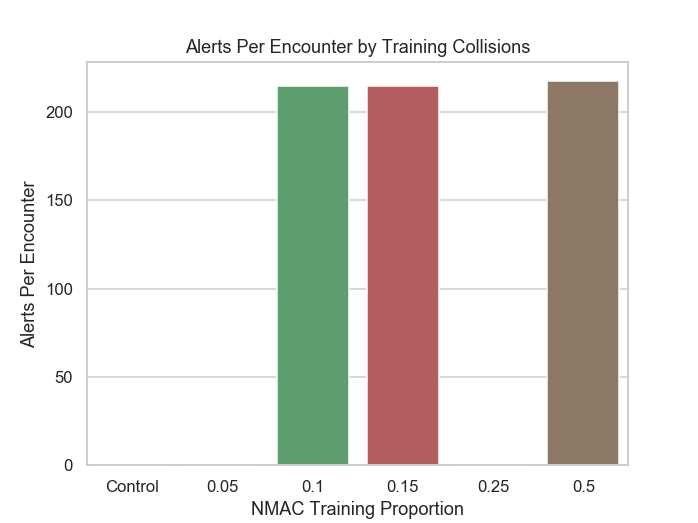

In [14]:
xs = list(res_pnmac.keys())
ys = [res_pnmac[x].alert for x in xs]

fig, ax = plt.subplots()
sns.barplot(x=xs, y=ys)
plt.xlabel('NMAC Training Proportion')
plt.ylabel('Alerts Per Encounter')
plt.title('Alerts Per Encounter by Training Collisions')
plt.show()

<IPython.core.display.Javascript object>


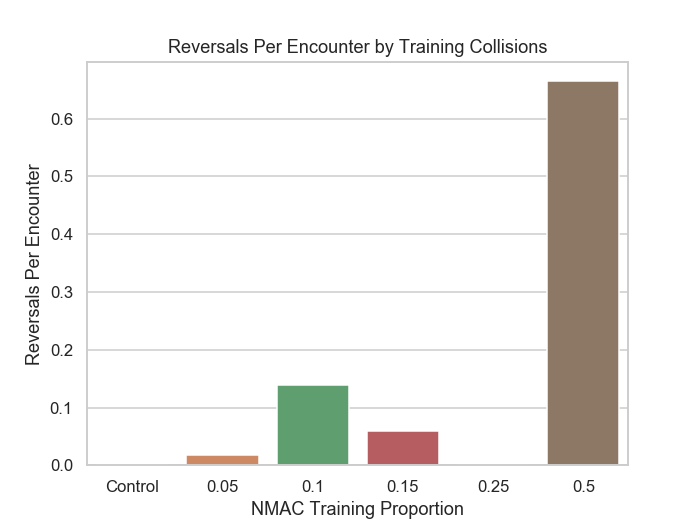

In [13]:
xs = list(res_pnmac.keys())
ys = [res_pnmac[x].reversal for x in xs]

fig, ax = plt.subplots()
sns.barplot(x=xs, y=ys)
plt.xlabel('NMAC Training Proportion')
plt.ylabel('Reversals Per Encounter')
plt.title('Reversals Per Encounter by Training Collisions')
plt.show()

### Reward Shaping Plots

<IPython.core.display.Javascript object>


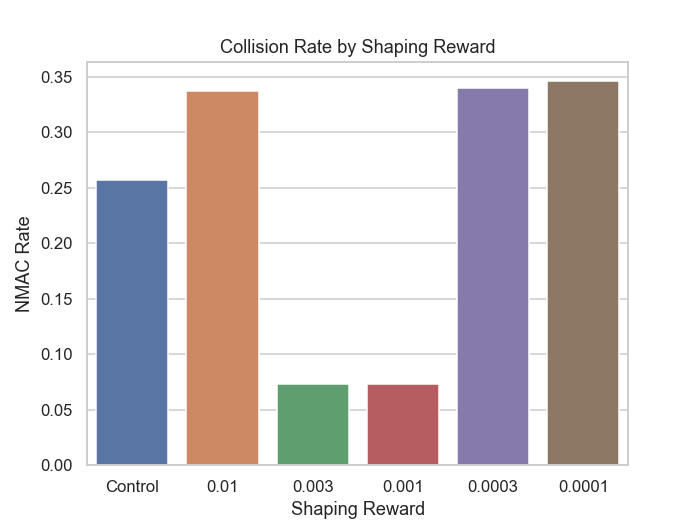

In [15]:
xs = list(res_rw_shp.keys())
ys = [res_rw_shp[x].nmac for x in xs]

fig, ax = plt.subplots()
sns.barplot(x=xs, y=ys)
plt.xlabel('Shaping Reward')
plt.ylabel('NMAC Rate')
plt.title('Collision Rate by Shaping Reward')
plt.show()

<IPython.core.display.Javascript object>


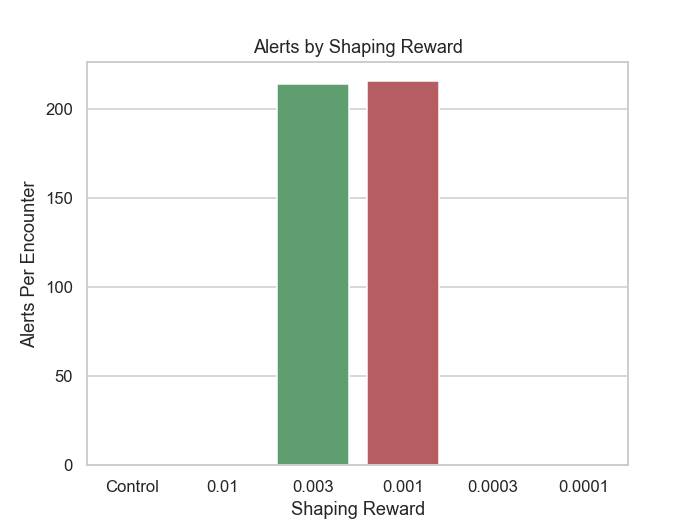

In [16]:
xs = list(res_rw_shp.keys())
ys = [res_rw_shp[x].alert for x in xs]

fig, ax = plt.subplots()
sns.barplot(x=xs, y=ys)
plt.xlabel('Shaping Reward')
plt.ylabel('Alerts Per Encounter')
plt.title('Alerts by Shaping Reward')
plt.show()

<IPython.core.display.Javascript object>


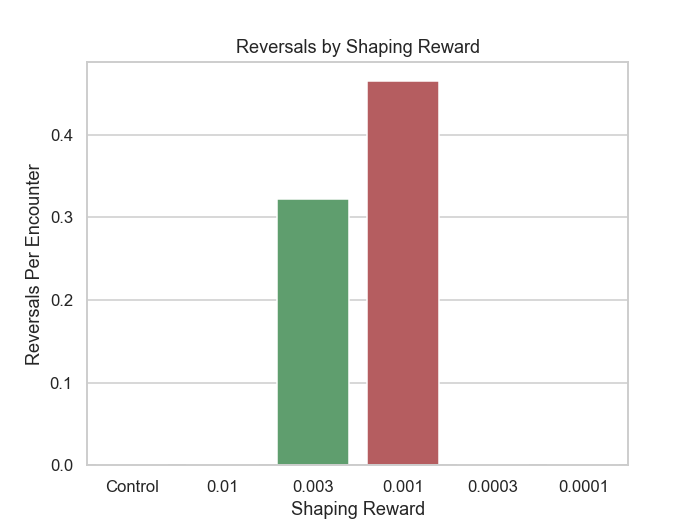

In [17]:
xs = list(res_rw_shp.keys())
ys = [res_rw_shp[x].reversal for x in xs]

fig, ax = plt.subplots()
sns.barplot(x=xs, y=ys)
plt.xlabel('Shaping Reward')
plt.ylabel('Reversals Per Encounter')
plt.title('Reversals by Shaping Reward')
plt.show()

In [ ]:
from src.agent.validation import create_encounter_set, collect_encounter_data

In [ ]:
encounters = create_encounter_set(10, p_nmac=1, seed=2)
all_encs = collect_encounter_data(encounters, 'int_behaviorsingle_act_encounter_s0')

In [ ]:
from src.plot import encounter_plot

In [ ]:
enc = all_encs[1]
encounter_plot(enc)